# **ICR - Identifying Age-Related Conditions**


Use Machine Learning to detect conditions with measurements of anonymous characteristics

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



```
# This is formatted as code
```

- more libraries would be added when necessary

---

# **Importing Datasets**

In [2]:
test = pd.read_csv("https://raw.githubusercontent.com/Ahma0205/Kaggle-competition-2208-Project/main/test.csv", index_col=[0])
train = pd.read_csv("https://raw.githubusercontent.com/Ahma0205/Kaggle-competition-2208-Project/main/train.csv", index_col=[0])
greeks =  pd.read_csv("https://raw.githubusercontent.com/Ahma0205/Kaggle-competition-2208-Project/main/greeks.csv")

# **EDA & Cleaning**

## general Information

### Train Dataset

In [3]:
train.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
train.shape

(617, 57)

- we have 617 rows and 57 columns

---

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 000ff2bfdfe9 to ffcca4ded3bb
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    

- we have one categorical feature and some features contains null that should be handled

---


In [6]:
null = train.isnull().sum()
null = null[null> 0]
print(null)


BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64


- BQ and El should be investigated more for choosing imputation method

---


### Greeks Dataset

In [7]:
greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [8]:
greeks.shape

(617, 6)

In [9]:
greeks.nunique()

Id         617
Alpha        4
Beta         3
Gamma        8
Delta        4
Epsilon    198
dtype: int64

In [10]:
greeks.describe()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
count,617,617,617,617,617,617
unique,617,4,3,8,4,198
top,000ff2bfdfe9,A,C,M,B,Unknown
freq,1,509,407,445,456,144


In [11]:
greeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       617 non-null    object
 1   Alpha    617 non-null    object
 2   Beta     617 non-null    object
 3   Gamma    617 non-null    object
 4   Delta    617 non-null    object
 5   Epsilon  617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


Since the Greeks metadata is only available in the training set and not in the test set, it has been decided not to include it in the models of this notebook. However, for future research, it is recommended to explore how this metadata could assist in training the model and its relationship with the features and target variable. One possible approach is to transform the binary classification problem into a multi-class classification problem by replacing the class 0 and 1 of the target variable with labels A, B, D, and G. This could provide an avenue for incorporating the Greeks data and potentially improve model performance. Further investigation in this direction may yield valuable insights.

---


## Exploring and Cleaning

### categorical feature in train dataset to numeric

In [12]:
train['EJ'].unique()

array(['B', 'A'], dtype=object)

In [13]:
train['EJ'] = train['EJ'].replace({'A': 0, 'B': 1})

- replacing hte only categorical feature to number as A to 0 and B to 1

---


In [14]:
df= train

- changing the name of data set to df as "train" may be confusing after dataset split to train and test

---


### Changing the name of some feature to remove the space in the name


In [15]:
df.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [16]:
df.rename(columns={'BD ': 'BD', 'CD ':'CD', 'CW ': 'CW', 'FD ':'FD' }, inplace=True)

### distribution of feature

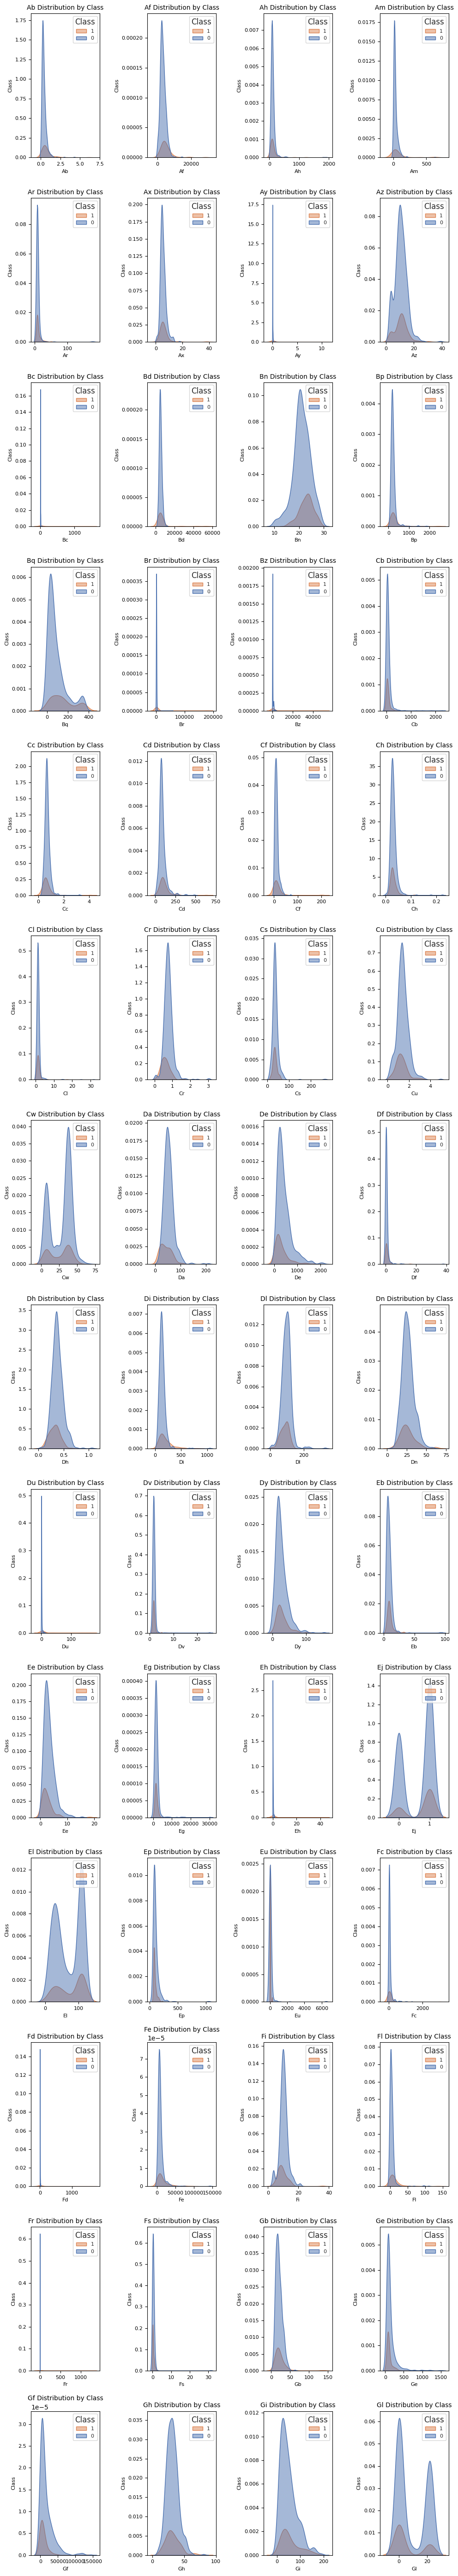

In [17]:
target = 'Class'

def plot_distribution(df):
    # Set the number of columns for the subplots.
    cols = 4
    # Calculate the number of rows based on the number of columns and the total number of features.
    rows = len(train.columns) // cols
    # Create a figure and a grid of subplots with the specified number of rows and columns.
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 4*rows))
    # Set the style and font scale for the plots.
    sns.set(font_scale=1, style='whitegrid')

    # Loop through each feature column in the DataFrame.
    for i, col_name in enumerate(train.columns):
        # Exclude the 'Class' column from the plot, as it is the target variable.
        if col_name != 'Class':
            # Get the current subplot.
            ax = axes[i // cols, i % cols]
            # Create a KDE plot for the current feature, separated by the target variable 'Class'.
            # The 'hue' parameter is set to 'target', which ensures that the KDE plot is colored based on the target classes.
            # The 'fill=True' option fills the area under the KDE curve.
            # The 'alpha=0.5' sets the transparency of the filled area.
            # The 'linewidth=1' adjusts the thickness of the KDE curve.
            sns.kdeplot(data=df, x=col_name, hue=target, ax=ax, fill=True, alpha=0.5, linewidth=1)

            # Set the title for the subplot, indicating the feature name and its distribution with respect to the target.
            ax.set_title(f'{col_name.title()} Distribution by {target.title()}', fontsize=10)
            # Set the x-axis label with the feature name.
            ax.set_xlabel(col_name.title(), fontsize=8)
            # Set the y-axis label with the target variable name.
            ax.set_ylabel(target.title(), fontsize=8)
            # Set the tick label size for both x-axis and y-axis.
            ax.tick_params(axis='both', which='major', labelsize=8)
            # Set the legend for the subplot, representing the target classes (0 and 1) with their titles.
            ax.legend([1, 0], title=target.title(), fontsize=8)

    # Adjust the layout and spacing between subplots for better visualization.
    plt.tight_layout()
    # Display the plot.
    plt.show()

# Call the function 'plot_distribution' with the DataFrame 'df' as input.
plot_distribution(df)


- Here are two important observations regarding the distributions of features:

  - The data set contains various types of distributions, and some of them may require transformation before they can be used for modeling. Since there is no specific pattern common to all of these distributions, employing Quantile Transformation, which is a general method known to work well with unspecified distributions, seems like a suitable approach.

  - It is noteworthy that the distributions of features across both target classes (0 and 1) are mostly similar. Therefore, no further effort is required to handle these distributions in the context of the target variable.

---

### corelations



#### Corelation Matrix

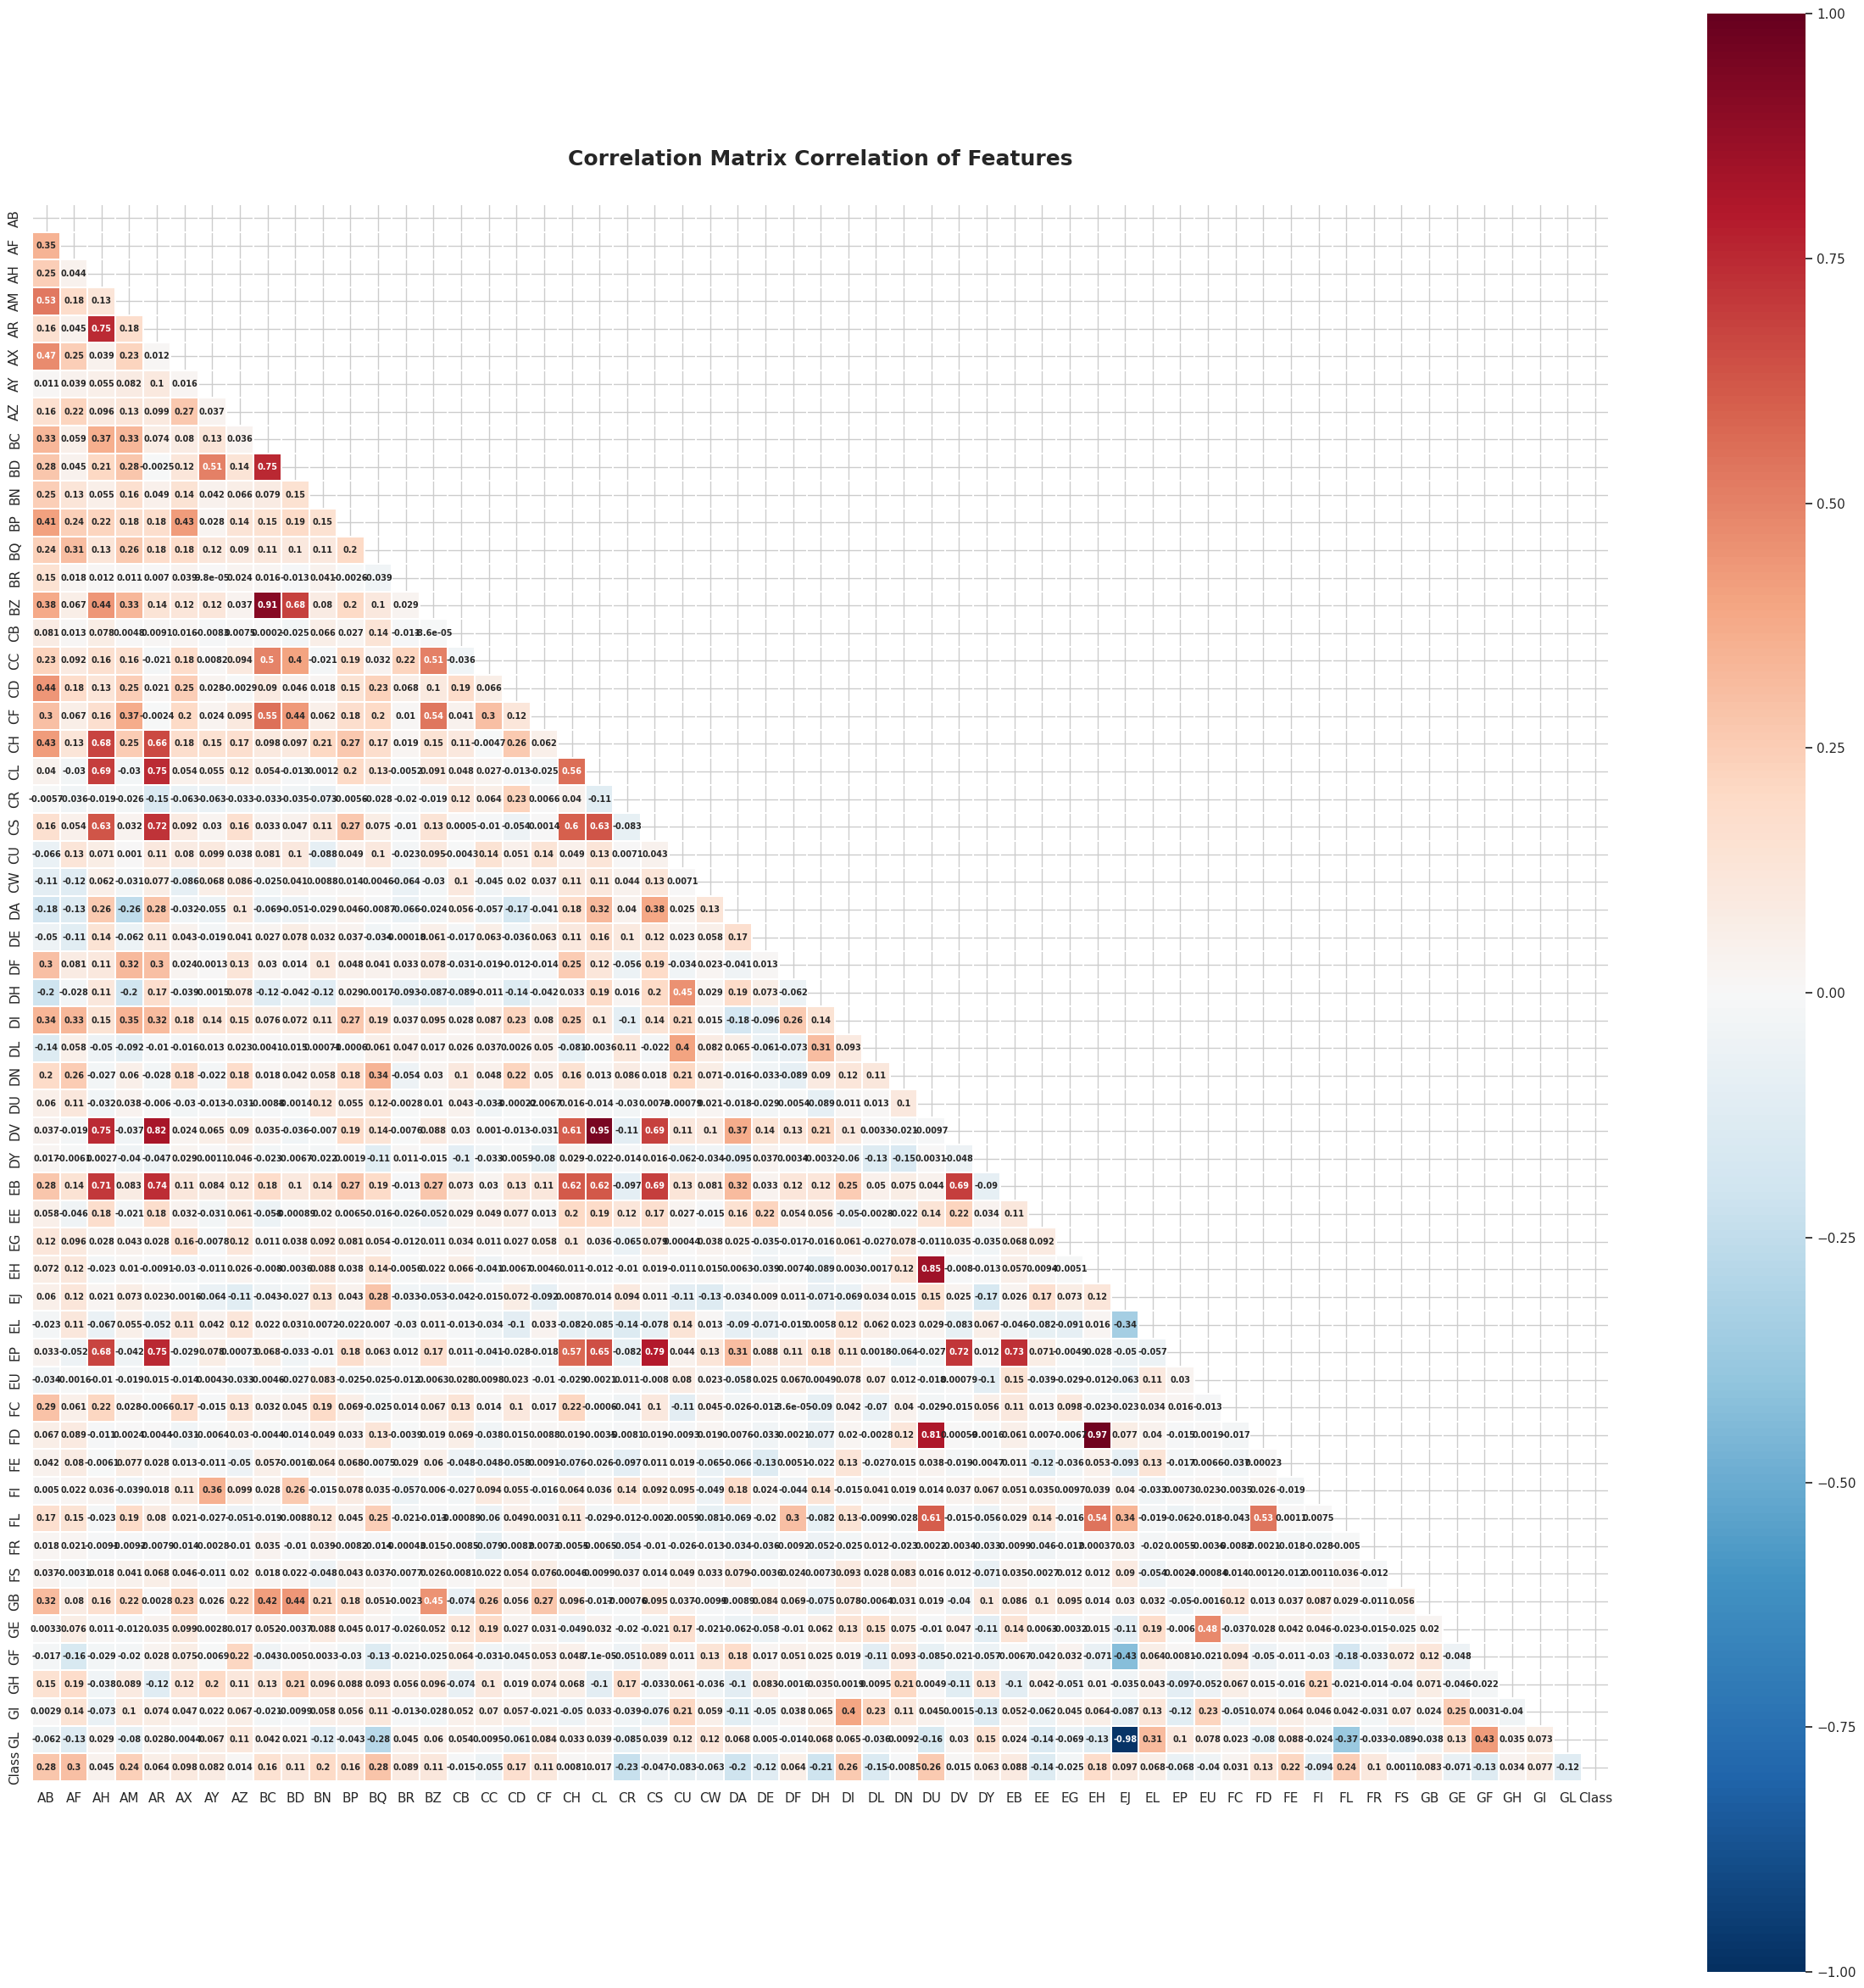

In [18]:
def plot_heatmap(df, title):
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    #Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True
    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(30, 30))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=18)

    # Plot the heatmap
    sns.heatmap(corr_matrix, linewidths=0.1, vmax=1.0, vmin=-1.0,
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 7, "weight": "bold"}, mask=mask)

# Call the function with the DataFrame and title
plot_heatmap(train, title='Correlation Matrix')

- Based on the table, it is evident that certain features exhibit high correlation with each other. In light of this correlation, we have the opportunity to enhance our model by reducing the number of features that do not contribute significantly to its performance. Thus, we can consider dropping these highly correlated features, as they are not providing any additional value to our model. By doing so, we can potentially improve the model's efficiency and maintain or even enhance its predictive capability. it is decided to remove corelations more 90%

---


In [19]:
import numpy as np

# Step 1: Calculate the correlation matrix for the DataFrame 'df'
correlation_matrix = df.corr()

# Step 2: Create a boolean mask to ignore the self-correlation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Step 3: Apply the mask to the correlation matrix to set the self-correlation values to NaN
correlation_matrix_masked = correlation_matrix.mask(mask)

# Step 4: Find highly correlated pairs in the masked correlation matrix
threshold = 0.9
highly_correlated = [
    (column, corr_column, correlation_matrix.loc[column, corr_column])
    for column in correlation_matrix_masked.columns
    for corr_column in correlation_matrix_masked.columns
    if (column != corr_column) and
    (correlation_matrix_masked.loc[column, corr_column] > 0.9 or
     correlation_matrix_masked.loc[column, corr_column] < -0.9
    )
]

# Step 5: Print the highly correlated pairs and their correlation values
for item in highly_correlated:
    print(f"Column {item[0]} has correlation of {item[2]:.2f} with {item[1]}")


Column BZ has correlation of 0.91 with BC
Column DV has correlation of 0.95 with CL
Column FD has correlation of 0.97 with EH
Column GL has correlation of -0.98 with EJ


To avoid potential mistakes in identifying highly correlated features from the correlation matrix visually, it is advisable to programmatically specify features with correlations greater than +0.90 or less than -0.90.

---


#### Dropping highly corelated features

In [20]:
# Drop the highly correlated columns
for item in highly_correlated:
    column_to_drop = item[0]
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
        print(f"Dropped column: {column_to_drop}")


Dropped column: BZ
Dropped column: DV
Dropped column: FD
Dropped column: GL


#### Investigating corelations more


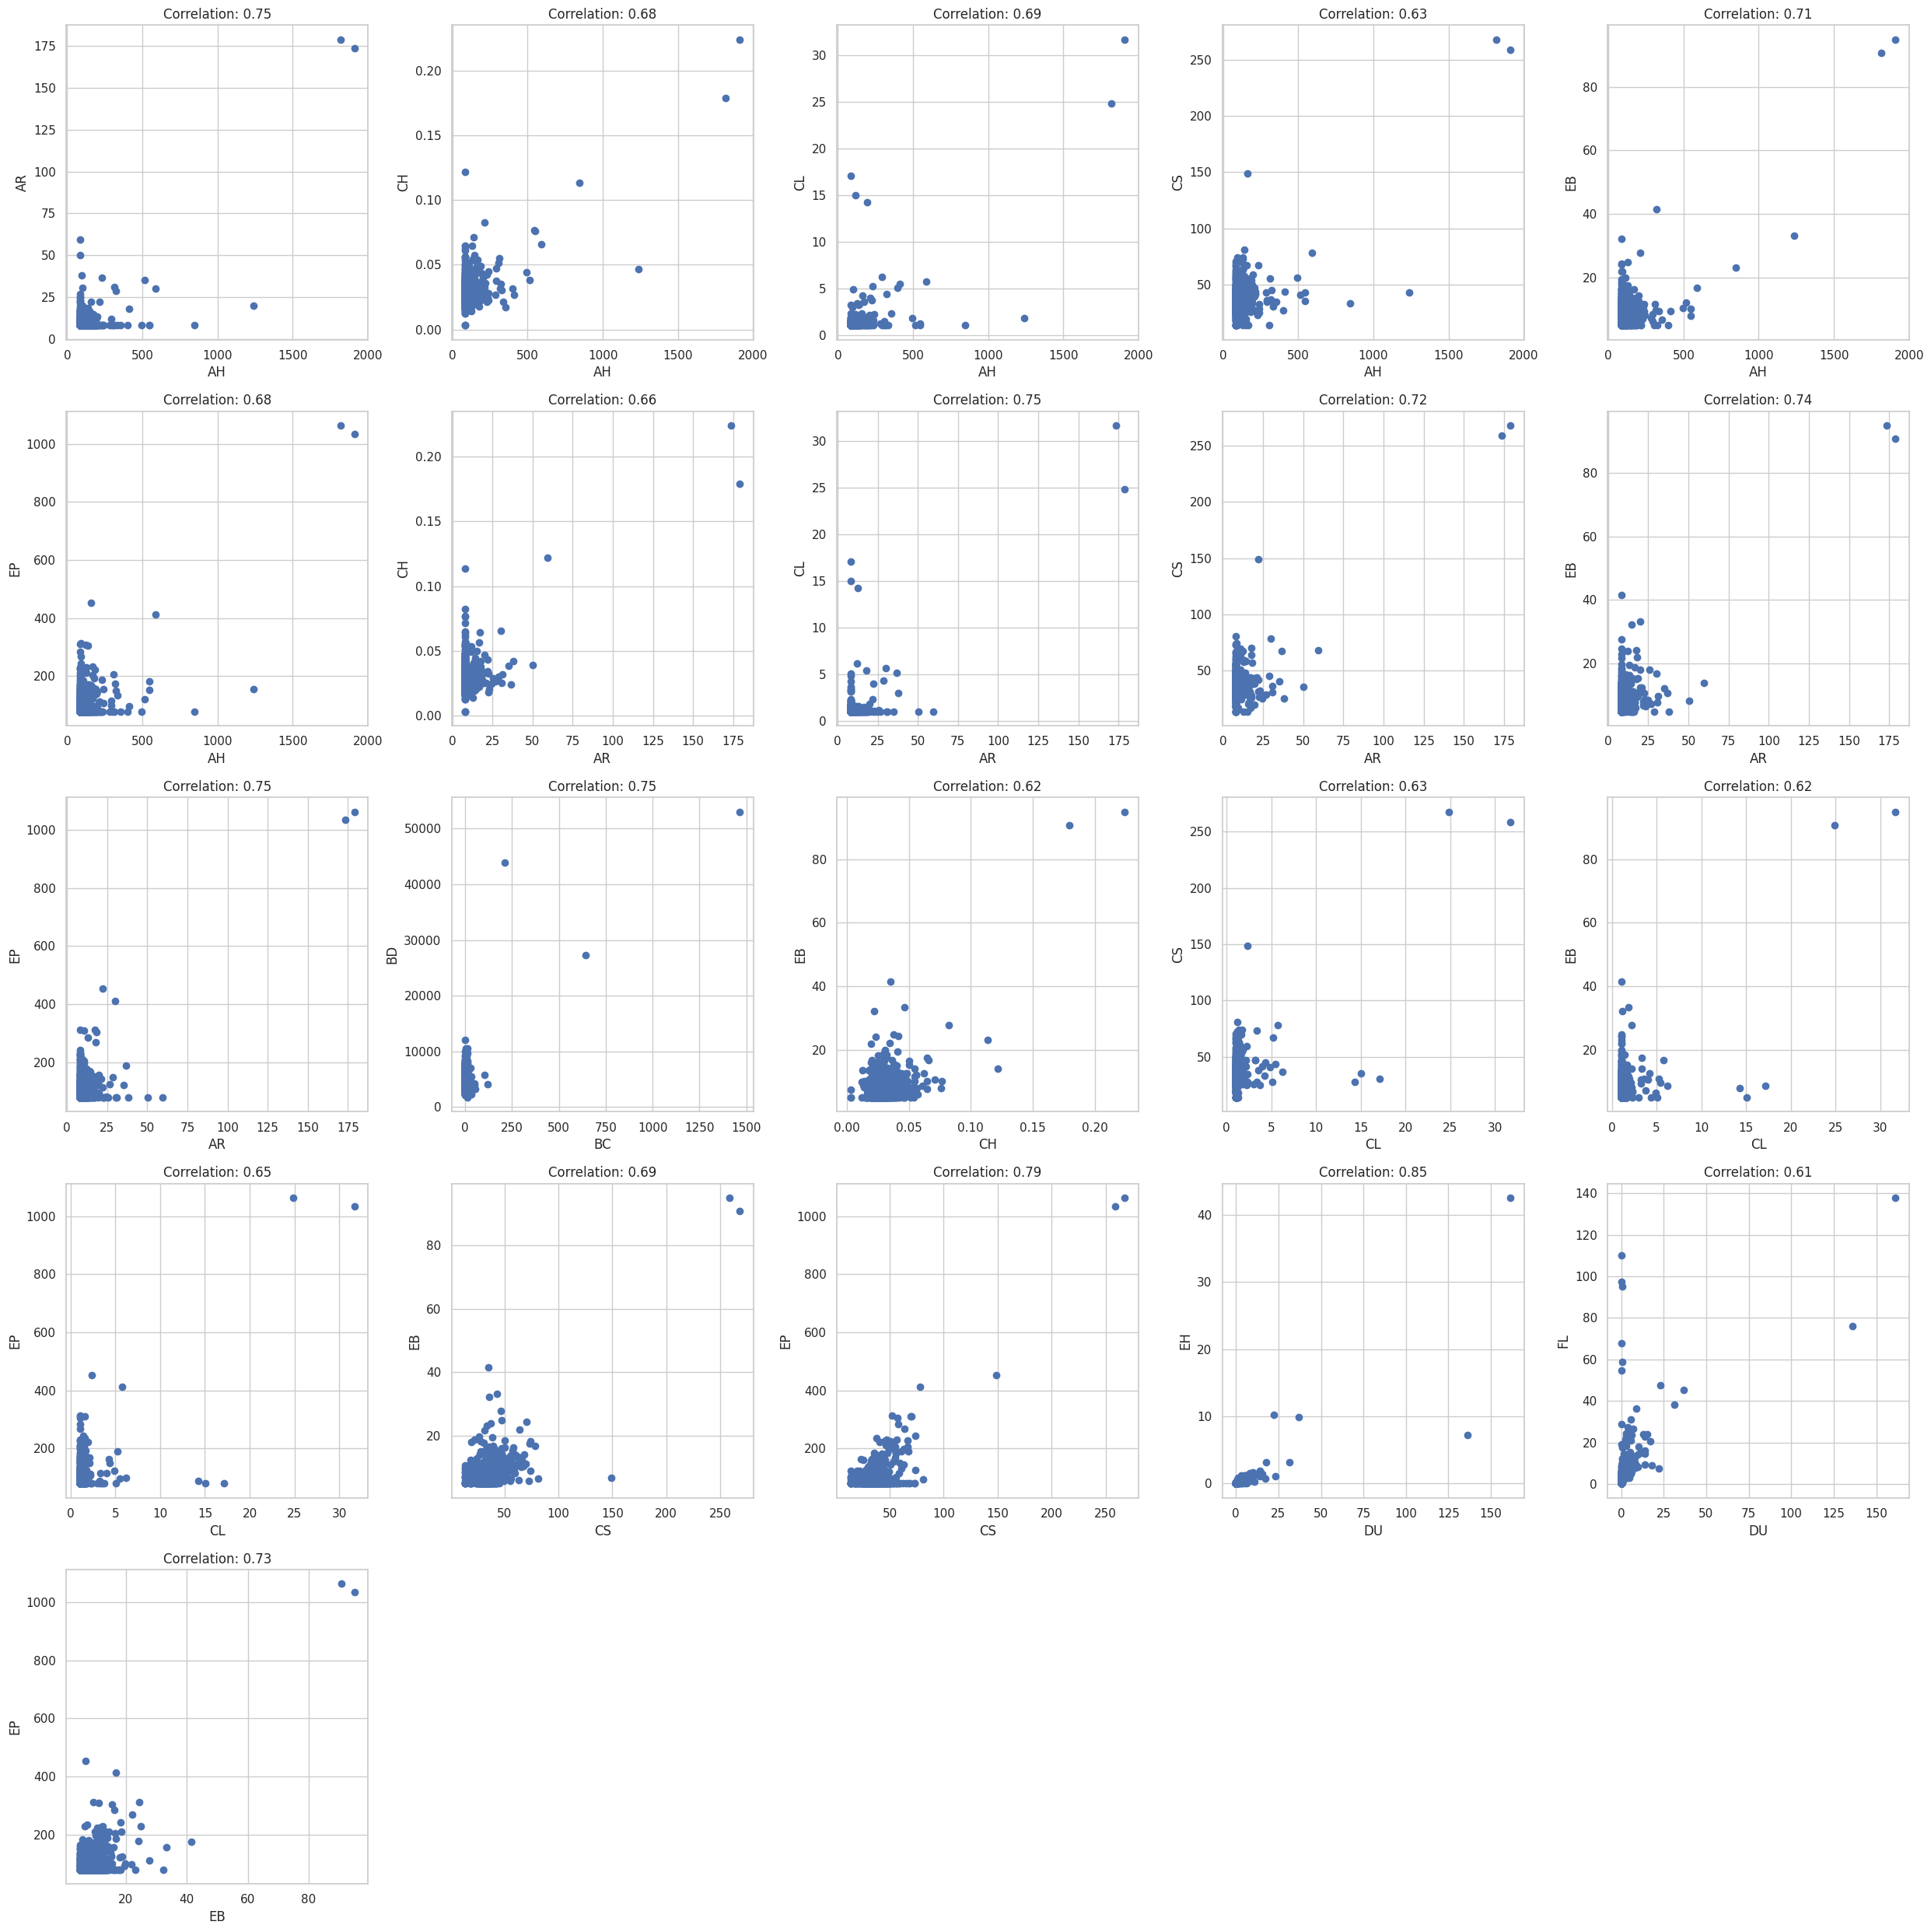

In [21]:
corr_matrix = df.corr()
# Get pairs with correlation above 0.5 (excluding self-correlations on the diagonal)
pairs_to_plot = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i+1, corr_matrix.shape[0]) if abs(corr_matrix.iloc[i, j]) > 0.6]

# Define how many plots per line
plots_per_line = 5

# Calculate required rows for subplot
rows = np.ceil(len(pairs_to_plot) / plots_per_line)

fig, ax = plt.subplots(int(rows), plots_per_line, figsize=(plots_per_line * 5, rows * 5))

# Flat the axes for easier iteration
ax = ax.flatten()

for idx, (i, j) in enumerate(pairs_to_plot):
    ax[idx].scatter(df.iloc[:, i], df.iloc[:, j])
    ax[idx].set_xlabel(df.columns[i])
    ax[idx].set_ylabel(df.columns[j])
    ax[idx].set_title(f'Correlation: {corr_matrix.iloc[i, j]:.2f}')

# Remove unused subplots
if len(pairs_to_plot) < len(ax):
    for idx in range(len(pairs_to_plot), len(ax)):
        fig.delaxes(ax[idx])

plt.tight_layout()
plt.show()


- Upon further investigation into the correlation between features, it has come to light that certain features' correlations might be influenced by the presence of outliers in one or more features. Addressing these outliers could potentially lead to a more accurate representation of the underlying relationships between the features.

---

#### Investigating highly corelated features to target variable

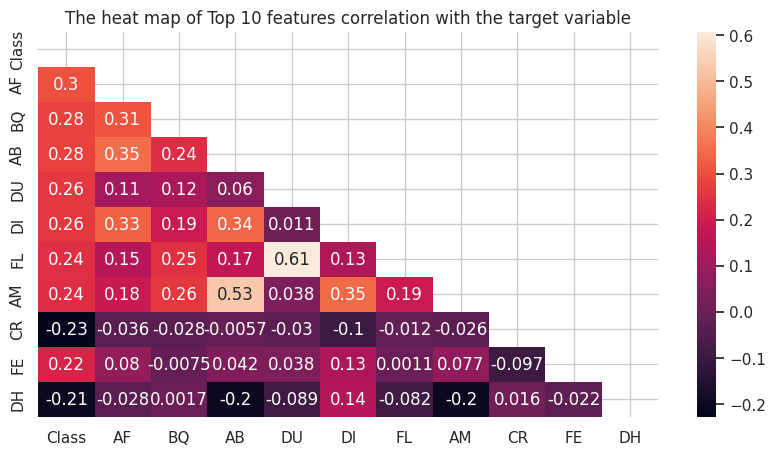

In [22]:
# Calculate the correlation matrix of the features
corr_matrix = df.corr()

# Identify the top 10 features most correlated with your target variable
top_corr_cols = corr_matrix["Class"].abs().nlargest(11).index

# Create a smaller correlation matrix with only these features
top_corr = corr_matrix.loc[top_corr_cols, top_corr_cols]

# Create a mask to hide the upper triangle of the correlation matrix (since it's a mirror of the lower triangle)
mask = np.zeros_like(top_corr)
mask[np.triu_indices_from(mask)] = True

# Generate the heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(top_corr, mask=mask, annot=True, ax=ax)

# Add title and show the plot
ax.set_title('The heat map of Top 10 features correlation with the target variable')
plt.show()


- Considering the limited number of rows in the dataset (617 records) and the relatively large number of features (57), there is a possibility that the model might encounter the overfitting problem. To address this issue, one approach is to only include highly correlated features with the target variable in the model, rather than importing all features. However, for the time being, we will continue with the entire dataset to assess if overfitting becomes a concern or not. By monitoring the model's performance and generalization capabilities, we can gain insights into the necessity of selecting only highly correlated features to mitigate potential overfitting in future iterations.

---


### Exploring Outliers

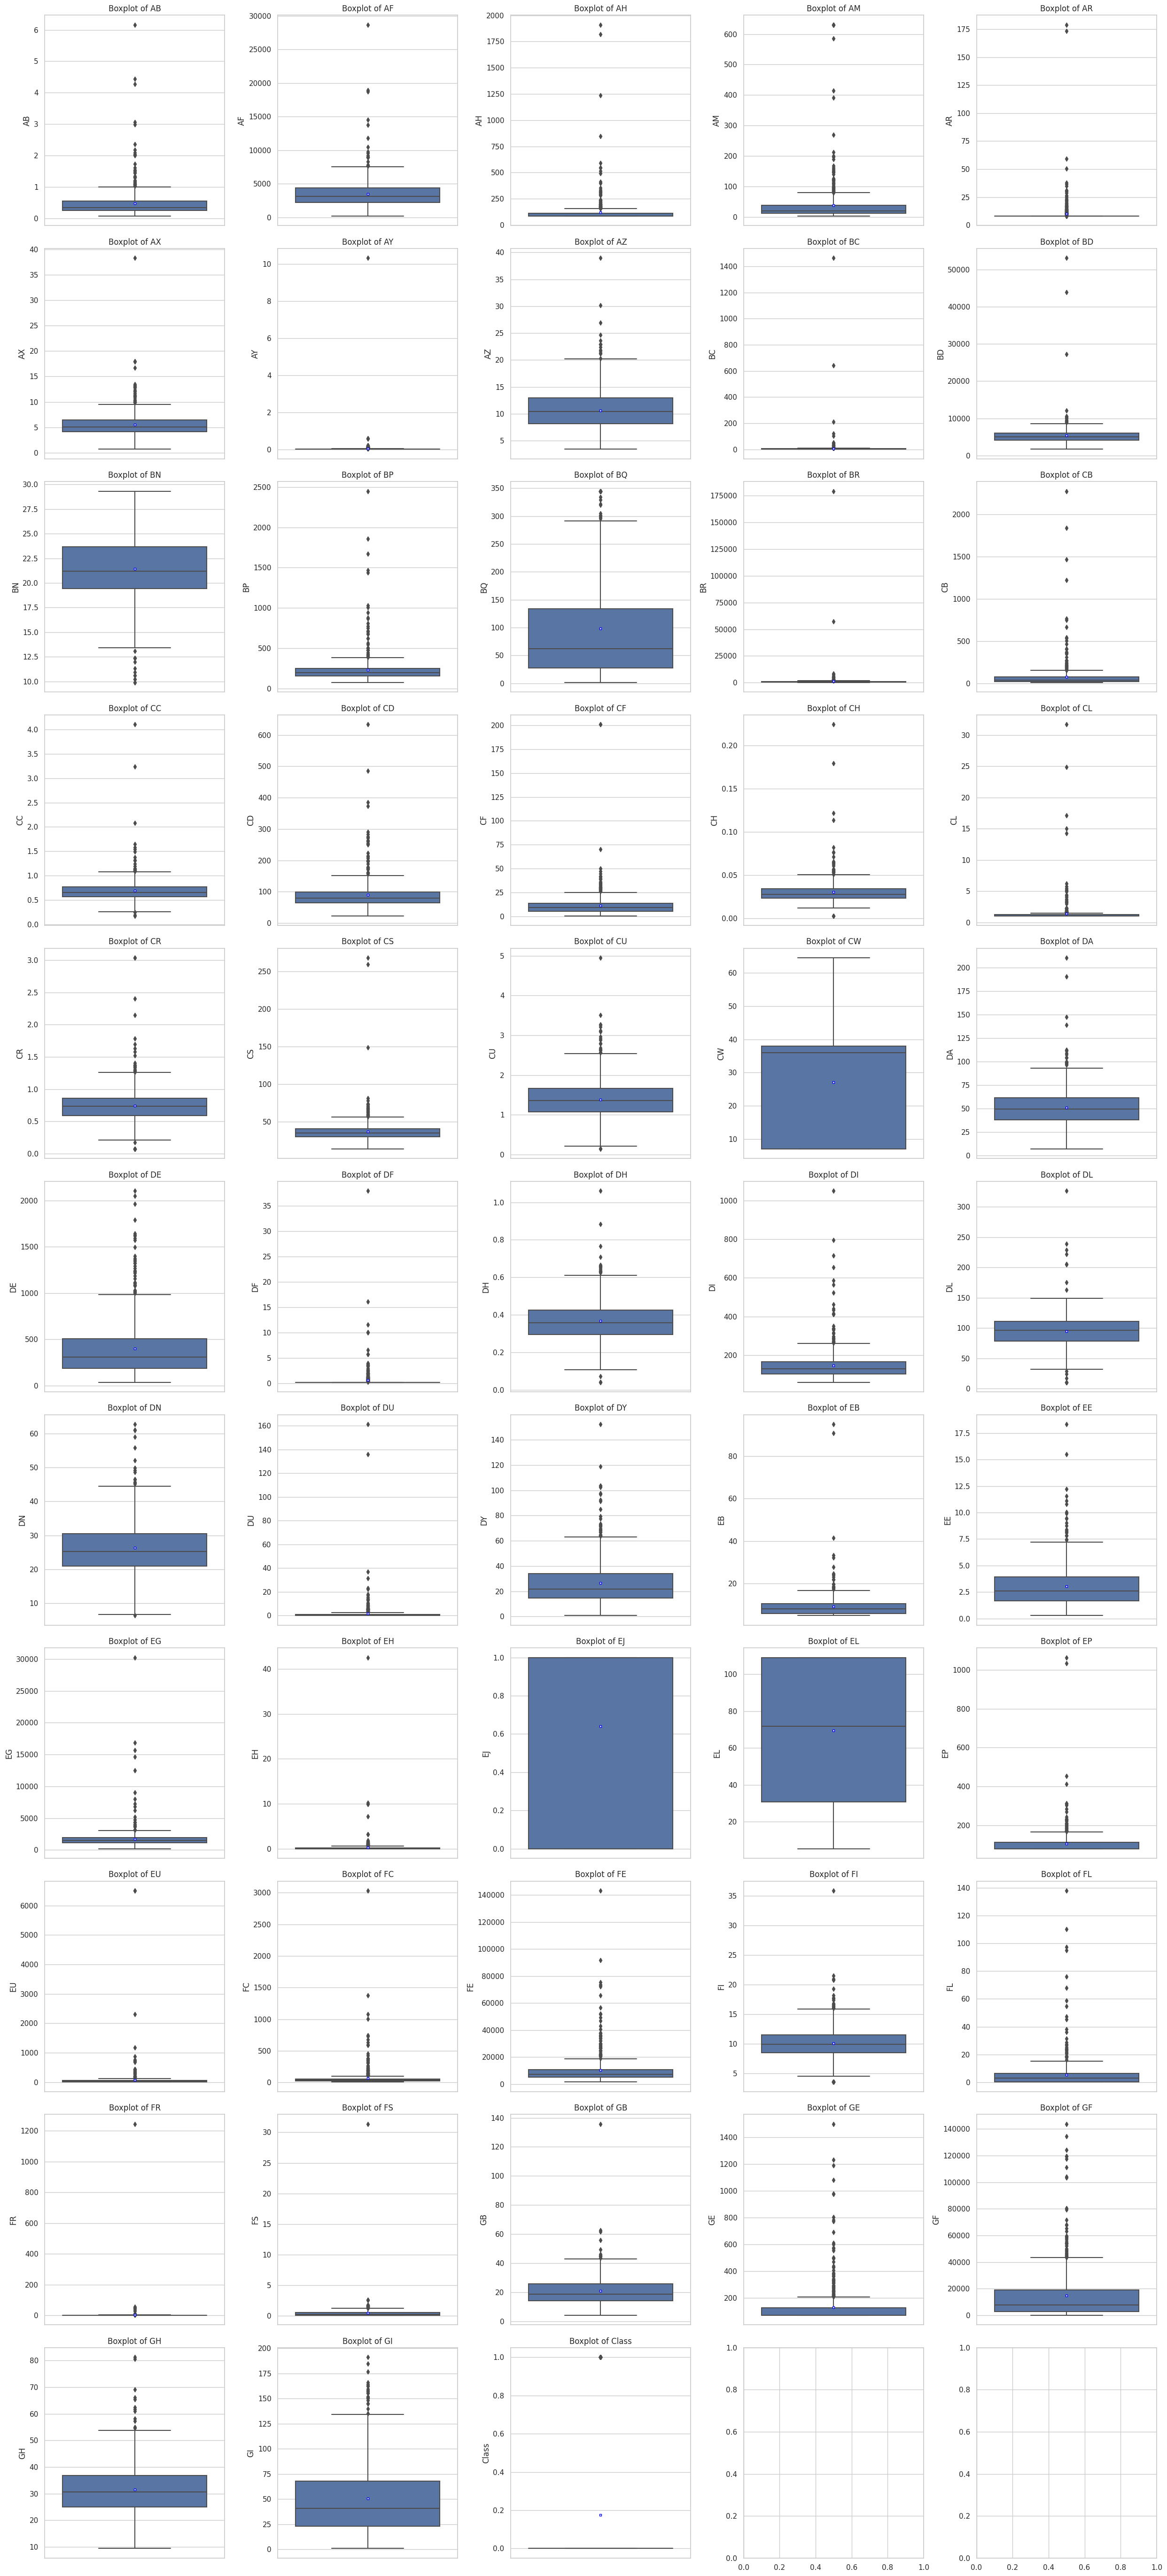

In [23]:
def plotbox(df, n_cols=3):

    # Set the style for the plots.
    sns.set_style('whitegrid')

    # Get the names of all columns in the DataFrame.
    cols = df.columns

    # Calculate the number of rows required based on the number of columns and the provided 'n_cols' value.
    n_rows = (len(cols) - 1) // n_cols + 1

    # Create a figure and a grid of subplots with the specified number of rows and columns.
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*5, n_rows*5))

    # If there are less than n_cols*2 plots, reshape the axes to be in a single row for better visualization.
    if len(cols) < n_cols*2:
        axes = np.reshape(axes, (-1,))

    # Loop through each numeric variable and create a boxplot in the corresponding subplot.
    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(y=var_name, data=df, ax=ax, showmeans=True,
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue", "markersize":"3"})
        ax.set_title(f'Boxplot of {var_name}')

    # Adjust the layout and spacing between subplots for better visualization.
    plt.tight_layout()
    # Display the plot.
    plt.show()

# Call the function with the DataFrame 'df' and specify the number of columns for subplot arrangement (n_cols=5).
plotbox(df, n_cols=5)


- It is evident that certain features in our dataset contain extreme outliers that need to be addressed. However, due to the limited number of rows, we must avoid removing any records to maintain the integrity of our dataset. Additionally, traditional methods such as identifying outliers using 1.5 IQR from the first and third quantiles could result in significant data alteration since we have a small dataset.

- Therefore, we have decided to take a visual approach to handle these outliers. For each feature, we will visually identify records that deviate significantly from others and replace them with the maximum value present in that specific feature. This way, we can mitigate the impact of outliers without compromising the overall size and structure of the dataset.

---


### Dealing with outlier

In [24]:
# Identify the outliers
outliers = {
    'AB': df['AB'] > 2.5,
    'AF': df['AF'] > 15000,
    'AH': df['AH'] > 1500,
    'AM': df['AM'] > 250,
    'CH': df['CH'] > 0.15,
    'AR': df['AR'] > 75,
    'AX': df['AX'] > 15,
    'CL': df['CL'] > 8,
    'DA': df['DA'] > 125,
    'AZ': df['AZ'] > 35,
    'AY': df['AY'] > 10,
    'BC': df['BC'] > 25,
    'BD': df['BD'] > 30000,
    'CS': df['CS'] > 100,
    'BP': df['BP'] > 800,
    'BR': df['BR'] > 50000,
    'CR': df['CR'] > 2.5,
    'CB': df['CB'] > 1000,
    'CC': df['CC'] > 2,
    'CU': df['CU'] > 4,
    'DF': df['DF'] > 12,
    'DH': df['DH'] > 0.8,
    'CF': df['CF'] > 50,
    'CD': df['CD'] > 400,
    'DI': df['DI'] > 800,
    'DL': df['DL'] > 300,
    'DU': df['DU'] > 25,
    'DY': df['DY'] > 120,
    'EB': df['EB'] > 30,
    'FI': df['FI'] > 25,
    'GB': df['GB'] > 100,
    'GH': df['GH'] > 70,
    'EE': df['EE'] > 15,
    'EP': df['EP'] > 350,
    'EH': df['EH'] > 2,
    'EG': df['EG'] > 20000,
    'FL': df['FL'] > 80,
    'FS': df['FS'] > 2,
    'EU': df['EU'] > 1000,
    'FC': df['FC'] > 2500,
    'FE': df['FE'] > 100000,
    'GE': df['GE'] > 800,
    'FR': df['FR'] > 20
}

# Remove the outliers
for feature, mask in outliers.items():
    df = df.loc[~mask]

# Replace removed outliers with the maximum value for each feature
for feature in outliers.keys():
    df[feature] = df[feature].fillna(df[feature].max())

- our data is clean and ready to go further for more engineering and modeling steps

---


# **Feature Engineering**

## Dataset Split with Stratified Sampeling


In [25]:
X = df.drop('Class', axis=1)
y=df['Class'].astype(int)

- Target variable splitted from dataset

---

In [26]:
# Split before imputation
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

-
This code snippet splits the dataset into training and test sets with an 80-20 ratio, respectively. The split is performed before any scaling or transformation is applied to avoid data leakage from the training set into the test set. Data leakage can occur when information from the training set unintentionally influences the test set, leading to overly optimistic performance metrics and unrealistic model evaluation. By conducting the split prior to any data processing steps, we ensure that the two sets remain independent and representative of their respective subsets, providing a reliable basis for model training and evaluation.
Also, stratify=y is used for stratified sampling. It ensures that the target variable's distribution is preserved in both the training and testing sets. By setting stratify=y, the split will be done in a way that maintains the same proportion of class labels in both sets as seen in the original dataset.

---

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((430, 52), (108, 52), (430,), (108,))

In [28]:
y.value_counts(),y_train.value_counts(),y_test.value_counts()

(0    464
 1     74
 Name: Class, dtype: int64,
 0    371
 1     59
 Name: Class, dtype: int64,
 0    93
 1    15
 Name: Class, dtype: int64)

- Stratified sampling worked well

---


## Trasforming

In [29]:
from sklearn.preprocessing import QuantileTransformer

# Create an instance of the QuantileTransformer with your desired settings.
Quantile_transformer = QuantileTransformer(n_quantiles=100, random_state=42)

#  Fit the transformer on the entire dataset to compute the quantiles and then transform the data.
transformed_data = Quantile_transformer.fit_transform(X_train)

# Step 4: Create a new DataFrame with the transformed data and column names.
X_train = pd.DataFrame(transformed_data, columns=X_train.columns)

X_test =  pd.DataFrame(Quantile_transformer.transform(X_test), columns=X_test.columns)

- As we mentioned before in data cleaning part, quantile tranform is suitable for our case

## Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

# Apply Normalization to the entire dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a new DataFrame with the Normalization data
X_train= pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Print the transformed dataset
X_train.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI
0,0.422017,-0.341262,-0.752157,0.192760,-0.473425,0.642064,-0.660335,-0.436720,-0.806351,-1.687749,...,-1.549777,-0.779837,0.322372,-1.336823,-1.332216,0.576038,1.525642,-1.726593,1.699210,0.970295
1,-0.139881,-1.240640,-0.752157,-0.400317,-0.473425,0.567981,-0.660335,-0.023530,-0.806351,-0.533299,...,-0.723024,0.318857,-1.183075,-1.336823,0.895473,-1.609629,1.276398,1.191581,-1.026805,-0.806762
2,-1.413750,1.333366,-0.752157,-0.701598,-0.473425,-0.140783,-0.660335,-0.313519,-0.806351,-0.575576,...,1.064086,0.293029,0.583596,-1.336823,0.349616,-0.479669,0.799710,-0.283667,-0.530624,0.389837
3,-0.680839,-0.607758,-0.752157,0.484330,2.231324,0.764501,-0.660335,0.847864,1.456793,-1.688731,...,1.264714,-0.153999,-1.183075,0.680018,-1.332216,0.547682,1.698793,0.946383,-1.324006,-1.206460
4,0.857468,1.006221,1.497062,-0.829092,2.120149,0.627915,1.780545,0.220653,0.812979,0.286038,...,0.684064,-0.640762,-1.183075,0.807144,-0.388030,1.693449,1.612415,1.370340,-0.897881,1.487106


- As our data has been transformed to normal form, we use standard scaler to turn them into same scale

In [31]:
X_test_scaled = scaler.transform(X_test)

# Create a new DataFrame with the Normalization data
X_test= pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

- After fitting the scaler with the training set, we use the same scaler to transform our test set. The scaling process is based solely on the statistics (e.g., mean and standard deviation) of the training set, and these statistics are then applied to the test set independently. This prevents any information from the test set from influencing the scaling process, maintaining the integrity of the evaluation and avoiding potential overfitting or biased results.

---


## Imputation

In [32]:
from sklearn.impute import KNNImputer

# Create the imputer
imputer = KNNImputer(n_neighbors=5)

# Fit on the training data
imputer.fit(X_train)

# Transform both training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# convert them back to DataFrame
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

- KNN imputation can be effective when you have a relatively small dataset, as it relies on finding similar samples in the feature space. It can capture complex relationships and patterns in the data, making it suitable for situations where the missing data might be systematically related to other features.

In [33]:
X_train.isnull().sum().sum()
X_test.isnull().sum().sum()

0

- There is not any null value in our dataset

# **Modeling**

## Oversampling with ADASYN

Length of the original data is: 538
Proportion of Class 1 data in original data is 13.72%
Proportion of Class 0 data in original data is 86.28%
Length of the resampled data is: 750
Proportion of class 1 data in resampled data is 50.53%
Proportion of class 0 data in resampled data is 49.47%


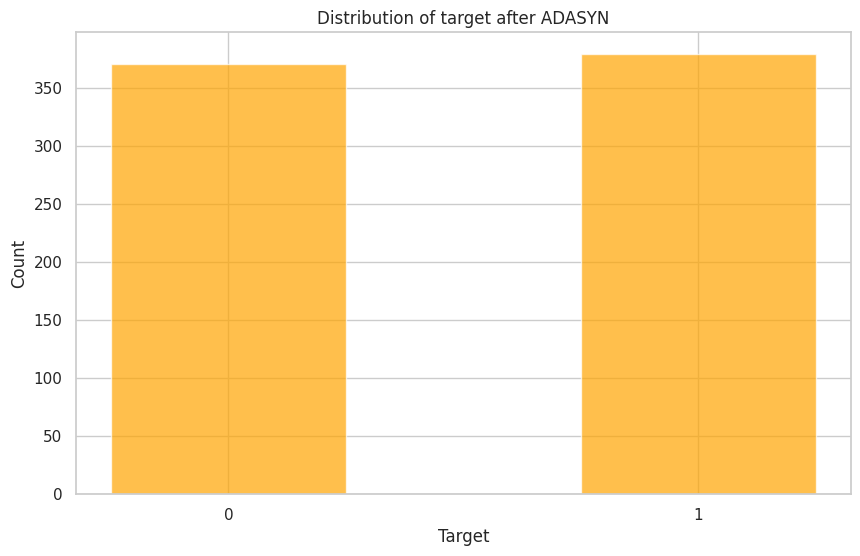

In [34]:
from imblearn.over_sampling import ADASYN

# Display the length of the original data and the proportion of each class in the target variable.
print("Length of the original data is:", len(df))
print("Proportion of Class 1 data in original data is {:.2%}".format(len(y_train[y_train == 1]) / len(y_train)))
print("Proportion of Class 0 data in original data is {:.2%}".format(len(y_train[y_train == 0]) / len(y_train)))

# Apply ADASYN to the training set
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Display the length of the resampled data and the proportion of each class in the target variable after ADASYN.
print("Length of the resampled data is:", len(X_train_resampled))
print("Proportion of class 1 data in resampled data is {:.2%}".format(len(y_train_resampled[y_train_resampled == 1]) / len(y_train_resampled)))
print("Proportion of class 0 data in resampled data is {:.2%}".format(len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled)))

# Plot the distribution of the target variable after ADASYN.
plt.figure(figsize=(10, 6))
plt.hist(y_train_resampled, bins=[-0.5, 0.5, 1.5], rwidth=0.5, color='orange', alpha=0.7)
plt.xticks([0, 1])
plt.title('Distribution of target after ADASYN')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


- Adaptive Synthetic Sampling (ADASYN) algorithm. ADASYN is an extension of the SMOTE method that generates more synthetic samples for the minority class instances that are difficult to classify. The key difference between ADASYN and SMOTE is that ADASYN focuses on generating more synthetic samples for those minority class instances that are harder to learn, rather than just uniformly creating synthetic samples as in SMOTE. This adaptability can be especially useful when the minority class is very sparse and contains complex patterns

## Model


### Importing necessary libraries for modeling

In [35]:
pip install catboost

In [36]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


### Creating the function for Evaluation as the Competition requests

In [37]:
import numpy as np

def balanced_log_loss(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of classes
    # calculate the number of observations for each class
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # extract the predicted probabilities for class 1
    p_1 = y_pred[:, 1]
    # clip the probabilities to avoid log(0) or log(1)
    p_1 = np.clip(p_1, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factor of 2 included to give the same result as LL with balanced input)
    balanced_log_loss = 2 * (w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss / (N_0 + N_1)

# source of code: https://www.kaggle.com/code/kaggleqrdl/postprocessin-ensemble

### Training initial Model

In [38]:
from sklearn.metrics import log_loss, precision_score
from sklearn.linear_model import LogisticRegression

models = {
    'Logistic regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski'),
    'Support vector kernel': SVC(kernel='rbf', random_state=42, probability=True),
    'Support vector linear kernel': SVC(kernel='linear', probability = True),
    'XGBOOST': XGBClassifier(),
    'Decision tree': DecisionTreeClassifier(),
    'Random forest': RandomForestClassifier(),
    'Naive bayes': GaussianNB(),
    'catb': CatBoostClassifier(verbose=0, iterations=300, depth=6, learning_rate=0.1, loss_function='Logloss', random_seed=42),
    'MLPC': MLPClassifier(hidden_layer_sizes=(300, 600, 100), activation="relu", solver='adam', random_state=42, alpha=0.01)
}

acc_train = []  # List to store train accuracy
acc_test = []   # List to store test accuracy
log_losses = []  # List to store log loss
precisions = []  # List to store precision scores
models_names = []
balanced_log_losses = []

for key, model in models.items():
    model.fit(X_train, y_train)
    models_names.append(key)

    # Calculate train accuracy using cross-validation
    train_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5)) * 100
    acc_train.append(train_accuracy)

    # Calculate test accuracy
    test_accuracy = model.score(X_test, y_test) * 100
    acc_test.append(test_accuracy)

    # Calculate log loss (only for models supporting probability estimation)
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)
        log_loss_value = log_loss(y_test, y_pred_prob)
        log_losses.append(log_loss_value)
    else:
        log_losses.append(None)


for key, model in models.items():
    if hasattr(model, 'predict_proba'):
        model.fit(X_train, y_train)  # Assuming you have X_train and y_train defined
        y_pred_prob = model.predict_proba(X_test)  # Assuming you have X_test defined

        y_true = y_test  # Assuming 'y_test' contains the true class labels for the test set
        balanced_log_loss_value = balanced_log_loss(y_true, y_pred_prob)
        balanced_log_losses.append(balanced_log_loss_value)
    else:
        balanced_log_losses.append(None)


models_scores = pd.DataFrame({
    'model name': models_names,
    'train accuracy': acc_train,
    'test accuracy': acc_test,
    'log loss': log_losses,
    'balanced_log_losses': balanced_log_losses,
})

models_scores.head(10)


,model name,train accuracy,test accuracy,log loss,balanced_log_losses
0,Logistic regression,91.395349,87.962963,0.487682,0.550316
1,KNN,91.860465,86.111111,1.190510,1.848975
2,Support vector kernel,90.930233,87.037037,0.344380,0.402360
3,Support vector linear kernel,91.162791,83.333333,0.396283,0.463060
4,XGBOOST,92.790698,86.111111,0.359849,0.517235
5,Decision tree,88.837209,85.185185,5.339801,5.489972
6,Random forest,91.395349,89.814815,0.284641,0.332116
7,Naive bayes,86.976744,86.111111,0.587663,0.654218
8,catb,92.790698,90.740741,0.374112,0.582787
9,MLPC,93.488372,91.666667,0.784161,1.060195


- It is evident that many of the models faced overfitting, which was expected given the small size of our dataset (only 617 records) and the limited number of samples (around 430) used for training after the train-test split. Overfitting occurs when a model becomes too tailored to the training data, capturing patterns that might not generalize well to new, unseen data. As a result, the performance on new data may be poor.

- In machine learning, the primary goal is to build models that can generalize well to new, unseen data, making accurate predictions beyond the training set. To address overfitting in our models, we can consider several approaches:

  - Use Simple Models: Instead of using complex models that might memorize the training data, opting for simpler models can reduce overfitting. Simple models have fewer parameters, making them less likely to fit noise in the data.

  - Feature Reduction or Feature Selection: Reducing the number of features or selecting the most important ones can help prevent overfitting and improve model generalization.

  - Hyperparameter Tuning: Careful tuning of hyperparameters can fine-tune the model's behavior and help find the right balance between underfitting and overfitting.

  - Ensemble Methods: Ensemble methods, such as Random Forest or Gradient Boosting, combine the predictions of multiple models to improve generalization and robustness.

- Moving forward, we will focus on tuning the models to optimize their performance. By finding the right hyperparameters , we aim to mitigate overfitting and improve the models' ability to make accurate predictions on new, unseen data.

# **Tunning**

In [39]:
# Define the classification models
models = {
    'Random forest': RandomForestClassifier(),
    'SVC': SVC(kernel='rbf',probability=True),
    'catb': CatBoostClassifier(verbose=0, iterations=300, loss_function='Logloss', random_seed=42),
    'XGBOOST': XGBClassifier(),
    'MLPC': MLPClassifier(hidden_layer_sizes=(30, 60, 10), activation="relu", solver='adam', random_state=42)
}


param_grid = {
        'Random forest': {
        'max_depth': [3],
        'n_estimators': [ 200, 300],
        'max_leaf_nodes': [3, 5],
        "criterion": ["gini", "entropy"],
        'max_features': ['sqrt', 'log2', None]
    },

    'SVC':{
          'kernel': ['rbf', 'sigmoid']
    },

    'XGBOOST': {
              'max_depth':[2],
              'gamma':[2,3],
              'eta': [0.5],
              'reg_alpha': [3],
              'reg_lambda':[3]
    },

    'catb': {
              'depth':[3],
              'learning_rate':[0.01,0.05],
    },

    'MLPC': {
              'alpha': [0.001, 0.01, 0.1]
    }

}

# Perform grid search cross-validation for each model and save the best models and parameters
best_models = {}
best_params = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

# Evaluate the best models using different metrics
for idx, (model_name, model) in enumerate(best_models.items()):
    print(f'Evaluation for {model_name}:')

    # Evaluate on the train set
    y_train_pred = model.predict(X_train)
    print('Train Set:')
    print(classification_report(y_train, y_train_pred))

    # Calculate log loss on the train set (if available)
    if hasattr(model, 'predict_proba'):
        y_train_prob = model.predict_proba(X_train)
        train_log_loss = balanced_log_loss(y_train, y_train_prob)
        print(f'Train balanced Log Loss: {train_log_loss}')

    # Evaluate on the test set
    y_test_pred = model.predict(X_test)
    print('Test Set:')
    print(classification_report(y_test, y_test_pred))

    # Calculate log loss on the test set (if available)
    if hasattr(model, 'predict_proba'):
        y_test_prob = model.predict_proba(X_test)
        test_log_loss = balanced_log_loss(y_test, y_test_prob)
        print(f'Test Balanced Log Loss: {test_log_loss}')

    # Add a dotted line after each model's result for better separation
    if idx < len(best_models) - 1:
        print('-' * 50)

# Print the best parameters for each model
for model_name, params in best_params.items():
    print(f'Best parameters for {model_name}: {params}')


Evaluation for Random forest:
Train Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       371
           1       0.92      0.80      0.85        59

    accuracy                           0.96       430
   macro avg       0.94      0.89      0.92       430
weighted avg       0.96      0.96      0.96       430

Train balanced Log Loss: 0.17189564199243643
Test Set:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        93
           1       0.55      0.40      0.46        15

    accuracy                           0.87       108
   macro avg       0.73      0.67      0.69       108
weighted avg       0.86      0.87      0.86       108

Test Balanced Log Loss: 0.46526264436965786
--------------------------------------------------
Evaluation for SVC:
Train Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       371
           1   


- After tuning the models with their best parameters, we evaluated their performance on both the training and test sets. The Random Forest, CatBoost, and XGBoost models showed relatively good performance on the training set but struggled with predicting class 1 accurately on the test set, indicating possible overfitting.

- To address this issue, we decided to use an ensemble method, specifically the VotingClassifier. This method combines the predictions of multiple base classifiers (Random Forest, CatBoost, and XGBoost) using hard voting to make the final prediction. By leveraging the strengths of each model, the ensemble can potentially mitigate overfitting and improve the overall performance on class 1 predictions.

- Further experimentation with different ensemble combinations and hyperparameters can help optimize the ensemble's performance and ensure better generalization on the specific dataset.

#**Evaluation models with Best parameters**

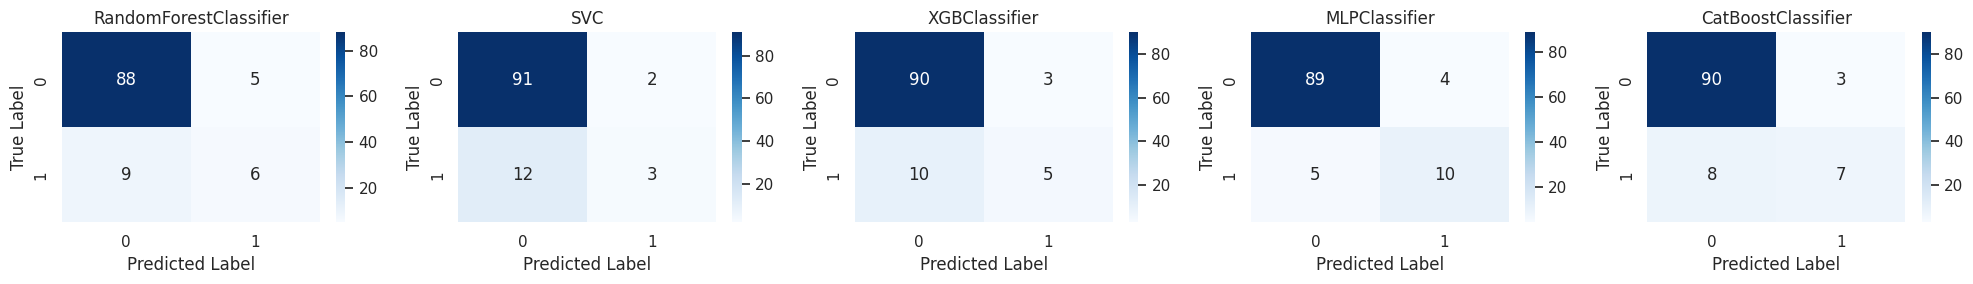

In [40]:
from sklearn.metrics import confusion_matrix

# Assuming the best parameters for Random Forest and XGBoost models are stored in these variables.
best_Rf_params = best_params['Random forest']
best_SVC_params = best_params['SVC']
best_XGB_params = best_params['XGBOOST']
best_MLPC_params = best_params['MLPC']
best_catb_params = best_params['catb']

models = {
    'Random forest': RandomForestClassifier(**best_Rf_params),
    'SVC': SVC(**best_SVC_params),
    'XGBOOST': XGBClassifier(**best_XGB_params),
    'MLPC': MLPClassifier(hidden_layer_sizes=(300, 600, 100), activation="relu", solver='adam', random_state=42, alpha=0.01),
    'catb': CatBoostClassifier(verbose=0, iterations=300, loss_function='Logloss', random_seed=42),


}


# Create a function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, ax):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(type(model).__name__)

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 3))

# Fit the models on the training data
for model in models.values():
    model.fit(X_train, y_train)

# Plot confusion matrix for each model
for i, model in enumerate(models.values()):
    plot_confusion_matrix(model, X_test, y_test, axes[i])

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


- The confusion matrix visualization provides an overview of the model's performance, showing how well it predicts true positive, false positive, true negative, and false negative values. This helps in evaluating and comparing the models' predictive abilities.
- comparing overall, performance of each model on confusion matrix it seems that MLPC has the best performance. but as each model have its own strenght, ensemble method mat aggregate the result to a better prediction







## Features Importance

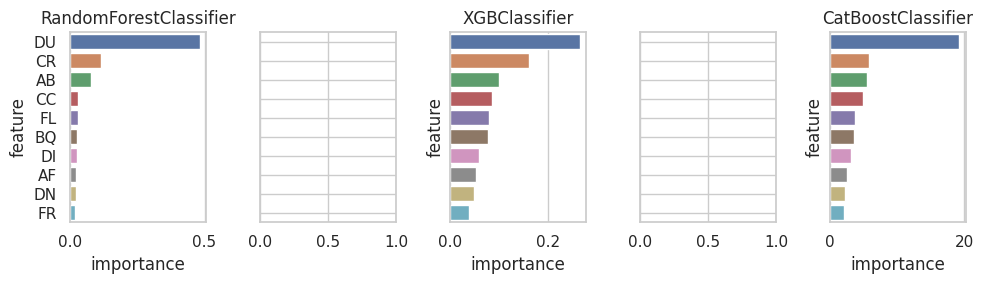

In [41]:
# Create a function to plot feature importance
def plot_feature_importance(model, ax):
    # Get feature importance
    importances = model.feature_importances_

    # Get feature names from your data
    feature_names = X_train.columns

    # Create a DataFrame for features and their importance
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

    # Sort DataFrame by importance
    importance_df = importance_df.sort_values(by='importance', ascending=False)

    # Plot feature importance
    sns.barplot(data=importance_df.head(10), x='importance', y='feature', ax=ax, orient='h')
    ax.set_title(f'{type(model).__name__}')

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, len(models), figsize=(10, 3), sharey='row')

# Fit the models on the training data and plot feature importance
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    if model_name in ['Random forest', 'XGBOOST','catb' ]:
        plot_feature_importance(model, axes[i])

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


# **Ensemble Methods**



## Stacking Classifier

In [42]:
from sklearn.ensemble import StackingClassifier

# Assuming the best parameters for each model are stored in these variables.
best_Rf_params = best_params['Random forest']
best_SVC_params = best_params['SVC']
best_CatBoost_params = best_params['catb']
best_XGBOOST_params = best_params['XGBOOST']
best_MLPC_params = best_params['MLPC']

# Define the classification models with their best parameters
models = {
    'Random forest': RandomForestClassifier(**best_Rf_params),
    'SVC': SVC(**best_SVC_params),
    'catb': CatBoostClassifier(**best_CatBoost_params, verbose=0, iterations=300, loss_function='Logloss', random_seed=42),
    'XGBOOST': XGBClassifier(**best_XGBOOST_params),
    'MLPC': MLPClassifier(**best_MLPC_params, hidden_layer_sizes=(300, 600, 100), activation='relu', solver='adam', random_state=42)

    }
# Initialize the StackingClassifier with a LogisticRegression meta-model
stacking_clf = StackingClassifier(estimators=list(models.items()), final_estimator=LogisticRegression())

# Fit the StackingClassifier on the training data
stacking_clf.fit(X_train, y_train)

# Evaluate on the train set
y_train_pred = stacking_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate log loss on the train set (if available)
if hasattr(stacking_clf, 'predict_proba'):
    y_train_prob = stacking_clf.predict_proba(X_train)
    train_log_loss = balanced_log_loss(y_train, y_train_prob)
else:
    train_log_loss = None

# Evaluate on the test set
y_test_pred = stacking_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Calculate log loss on the test set (if available)
if hasattr(stacking_clf, 'predict_proba'):
    y_test_prob = stacking_clf.predict_proba(X_test)
    test_log_loss = balanced_log_loss(y_test, y_test_prob)
else:
    test_log_loss = None

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Train Accuracy:", train_accuracy)
print("Train Classification Report:")
print(train_classification_report)

if train_log_loss is not None:
    print("Train balanced Log Loss:", train_log_loss)

print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:")
print(test_classification_report)

if test_log_loss is not None:
    print("Test balanced Log Loss:", test_log_loss)

Evaluation Metrics:
Train Accuracy: 1.0
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00        59

    accuracy                           1.00       430
   macro avg       1.00      1.00      1.00       430
weighted avg       1.00      1.00      1.00       430

Train balanced Log Loss: 0.01074536204671909

Test Accuracy: 0.9074074074074074
Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        93
           1       0.69      0.60      0.64        15

    accuracy                           0.91       108
   macro avg       0.81      0.78      0.79       108
weighted avg       0.90      0.91      0.90       108

Test balanced Log Loss: 0.3431110533433915


- With this stacking we could improve the performance of the model to 88% fro class 1 in test set. we are going to test different ensemble methods to see the results

## Voting Classifier

In [43]:
from sklearn.ensemble import VotingClassifier

# Assuming you have defined X_train, y_train, X_test, y_test, and best_params for each model as before.

# Define the classification models with their best parameters
models = {
    'Random forest': RandomForestClassifier(**best_Rf_params),
    'catb': CatBoostClassifier(**best_CatBoost_params, verbose=0, iterations=300, loss_function='Logloss', random_seed=42),
    'XGBOOST': XGBClassifier(**best_XGBOOST_params),
    'MLPC': MLPClassifier(**best_MLPC_params, hidden_layer_sizes=(300, 600, 100), activation='relu', solver='adam', random_state=42)
}

# Initialize the VotingClassifier with the models
voting_clf = VotingClassifier(estimators=list(models.items()), voting='hard')  # 'hard' voting means majority rule

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Evaluate on the train set
y_train_pred = voting_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate log loss on the train set (if available)
if hasattr(voting_clf, 'predict_proba'):
    y_train_prob = voting_clf.predict_proba(X_train)
    train_log_loss = balanced_log_loss(y_train, y_train_prob)
else:
    train_log_loss = None

# Evaluate on the test set
y_test_pred = voting_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Calculate log loss on the test set (if available)
if hasattr(voting_clf, 'predict_proba'):
    y_test_prob = voting_clf.predict_proba(X_test)
    test_log_loss = balanced_log_loss(y_test, y_test_prob)
else:
    test_log_loss = None

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Train Accuracy:", train_accuracy)
print("Train Classification Report:")
print(train_classification_report)

if train_log_loss is not None:
    print("Train balanced Log Loss:", train_log_loss)

print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:")
print(test_classification_report)

if test_log_loss is not None:
    print("Test balanced Log Loss:", test_log_loss)


Evaluation Metrics:
Train Accuracy: 0.9813953488372092
Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       371
           1       1.00      0.86      0.93        59

    accuracy                           0.98       430
   macro avg       0.99      0.93      0.96       430
weighted avg       0.98      0.98      0.98       430


Test Accuracy: 0.9074074074074074
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        93
           1       0.86      0.40      0.55        15

    accuracy                           0.91       108
   macro avg       0.88      0.69      0.75       108
weighted avg       0.90      0.91      0.89       108



 - voting classifier could not improve the result. So Stacking classifiers would be considered as the final model of this notebook.

- The feature importance analysis reveals that both CatBoost and Random Forest heavily rely on the "CR" feature to make predictions. However, XGBoost shows a more balanced consideration of various features, suggesting that it might be a better model in terms of utilizing the entire feature set for its predictions.

# **Conclusion**

- Even though significant improvements have been made in model performance through various methods in each step including feature engineering, tuning and ensembles, overfitting is still an issue due to the small dataset size. Additionally, the model's difficulty in predicting class 1 is a notable concern.

- To address this, the recommendation is to conduct further research and exploration specifically focusing on class 1 of the dataset. Some possible approaches are suggested:

  - Utilize Metadata: Consider incorporating metadata into the analysis. Adding relevant metadata features might help improve predictions for class 1.

  - Multiple Models for Class 1: Instead of predicting class 1 as a single entity, consider breaking it down into multiple subgroups and using separate models for each subgroup. This might lead to better predictions for class 1.

  - Investigate Metadata-Class Relationship: Investigate the relationship between metadata and the target class. Analyzing how metadata is related to class 1 could offer insights into improving predictions.

- By implementing these suggestions, future research can aim to further enhance the model's performance, particularly in predicting class 1, and address the challenges posed by the small dataset size.

# **Submission to Kaggle competition**

## cleaning and feature engineering

In [44]:
testcopy=test.copy()
test

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
test.isnull().sum().sum()

0

In [46]:
test['EJ'] = test['EJ'].replace({'A': 0, 'B': 1})

In [47]:
test.rename(columns={'BD ': 'BD', 'CD ':'CD', 'CW ': 'CW', 'FD ':'FD' }, inplace=True)

In [48]:
test.drop(['BZ','DV', 'FD','GL'] ,axis=1,inplace=True)

In [49]:
test_scaled =scaler.transform(test)

In [50]:
test= pd.DataFrame(test_scaled, columns=test.columns, index=test.index)

- the same step and transformers in training used to get the test set ready for the prediction

---


## prediction with final model

In [51]:
selected_model = stacking_clf

In [52]:
# The 'predict' method takes the test data as input and returns the predicted target values for each sample.
testcopy['prediction'] = selected_model.predict(test)

In [53]:
# The 'predict_proba' method takes the test data as input and returns the predicted probabilities for each class.
testcopy[['predict_0_proba','predict_1_proba']]=selected_model.predict_proba(test)

In [54]:
testcopy

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FS,GB,GE,GF,GH,GI,GL,prediction,predict_0_proba,predict_1_proba
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.756649,0.243351
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.756649,0.243351
02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.756649,0.243351
040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.756649,0.243351
046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.756649,0.243351
